### Mopsy and Mocha ####

#### Introduction ###
Here in this machine learning project, we will be using the concept of convolutional linear regression, where we will be interaction a set of images, some with a dog and others with a cat. The data set has already been divided into a testing and training set, where we will begin to train a model to identify cats, dogs, and the differences between them.


Below is some code that allows for the importing of all images as a Numpy array, for which the skimage library was used. First, all related libraries were imported.

In [1]:
import sys, os
import skimage.io, skimage.color
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This function returns the shape of an image, given a folder path and a filename. This is returned as a Numpy array.

In [2]:
def get_image_resolution(folder, file):
    full_path = os.path.join(folder, file)
    img_data = skimage.io.imread(full_path)
    bw_data = skimage.color.rgb2gray(img_data)
    return bw_data.shape

As a proof of concept to show that pictures could be read, all training dog pictures were opened into a Numpy array, where the `get_image_resolution()` function extracted the shape as long as the image is opened. Only one folder is needed for this proof of concept.

In [3]:
# First, we need to get every single file.
training_dog_folder = "training_set/dogs"
test_dog_folder = "test_set/dogs"

training_dog_paths = os.listdir(training_dog_folder)
training_dog_resolutions = [get_image_resolution(training_dog_folder, i) for i in training_dog_paths]

print(training_dog_resolutions)

[(499, 370), (499, 286), (160, 237), (215, 166), (500, 269), (500, 409), (304, 495), (240, 319), (233, 350), (254, 385), (375, 499), (359, 480), (499, 267), (374, 500), (500, 415), (375, 499), (374, 500), (280, 324), (358, 419), (375, 499), (497, 500), (399, 336), (374, 500), (379, 500), (431, 336), (500, 332), (269, 360), (500, 272), (325, 424), (500, 433), (340, 457), (500, 496), (171, 299), (122, 160), (375, 499), (375, 499), (500, 298), (418, 500), (300, 226), (447, 350), (261, 350), (374, 500), (398, 500), (395, 375), (374, 500), (485, 480), (374, 500), (374, 500), (500, 491), (422, 449), (374, 500), (288, 359), (332, 500), (418, 411), (239, 320), (375, 499), (251, 250), (392, 499), (375, 499), (187, 138), (380, 500), (500, 335), (418, 499), (500, 426), (374, 500), (387, 480), (309, 296), (251, 350), (374, 500), (210, 359), (361, 387), (479, 455), (499, 375), (337, 499), (276, 349), (154, 300), (499, 420), (265, 500), (269, 360), (499, 397), (458, 499), (500, 352), (374, 500), (32

With these resolutions, next week, the resolutions will be filtered using a histogram, so comparisons can only be made between similarly sized pictures. Since reading these resolutions requires getting the shape of each Numpy array of pixels, it indicates that every image file in a folder of pictures was opened.

Our progress is available at https://github.com/andy64734/all-might.

In [4]:
HORIZ_INDEX = 0
VERT_INDEX = 1

horiz_reses = pd.Series([i[HORIZ_INDEX] for i in training_dog_resolutions])
vert_reses = pd.Series([i[VERT_INDEX] for i in training_dog_resolutions])
print(horiz_reses.mode())
print(vert_reses.mode())

0    374
dtype: int64
0    500
dtype: int64


In [5]:
"""
plt.hist2d(horiz_reses,vert_reses,bins=40)
plt.colorbar()
plt.show()
"""

'\nplt.hist2d(horiz_reses,vert_reses,bins=40)\nplt.colorbar()\nplt.show()\n'

Text(336.971,0.5,'Vertival')

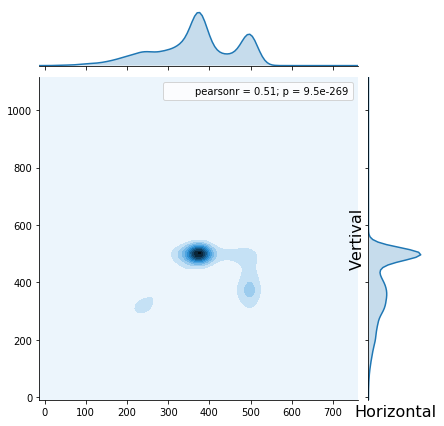

In [6]:
%matplotlib inline
sns.jointplot(np.array(horiz_reses), np.array(vert_reses), kind="kde")
plt.xlabel("Horizontal", fontsize=16)
plt.ylabel("Vertival", fontsize=16)

In [7]:
"""
Generates a Pandas DataFrame, corresponding all the paths and resolutions
into appropriate columns.
"""
def generate_df(paths, reses):
    horiz = [i[0] for i in reses]
    vert = [i[1] for i in reses]
    
    df = pd.DataFrame({'path': paths, 'horiz': horiz, 'vert': vert })    
    return df

In [8]:
training_dog_df = generate_df(training_dog_paths, training_dog_resolutions)
print(training_dog_df)

              path  horiz  vert
0      dog.697.jpg    499   370
1     dog.1950.jpg    499   286
2     dog.2963.jpg    160   237
3     dog.2606.jpg    215   166
4     dog.3641.jpg    500   269
5     dog.3875.jpg    500   409
6     dog.2414.jpg    304   495
7     dog.2482.jpg    240   319
8     dog.2289.jpg    233   350
9      dog.669.jpg    254   385
10    dog.3224.jpg    375   499
11    dog.3861.jpg    359   480
12     dog.970.jpg    499   267
13    dog.2649.jpg    374   500
14    dog.2337.jpg    500   415
15    dog.2173.jpg    375   499
16    dog.3870.jpg    374   500
17    dog.3915.jpg    280   324
18    dog.3881.jpg    358   419
19    dog.3218.jpg    375   499
20    dog.1035.jpg    497   500
21    dog.3043.jpg    399   336
22    dog.2378.jpg    374   500
23     dog.637.jpg    379   500
24     dog.832.jpg    431   336
25    dog.2681.jpg    500   332
26    dog.3996.jpg    269   360
27     dog.363.jpg    500   272
28    dog.2169.jpg    325   424
29    dog.1526.jpg    500   433
...     

{'figure.facecolor': 'white',
 'text.color': '.15',
 'axes.labelcolor': '.15',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.linestyle': '-',
 'lines.solid_capstyle': 'round',
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.linewidth': 0,
 'grid.color': 'white',
 'xtick.major.size': 0,
 'ytick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.minor.size': 0}

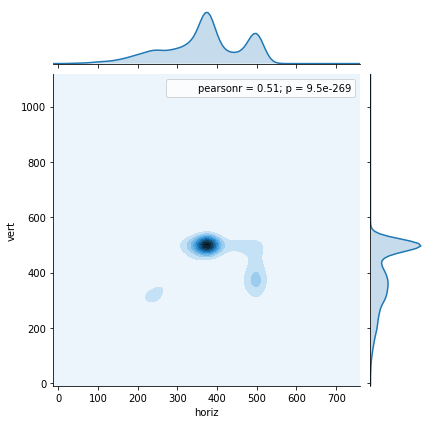

In [9]:
sns.jointplot(training_dog_df['horiz'], training_dog_df['vert'], kind="kde")
sns.axes_style("darkgrid")

In [10]:
print(training_dog_df['horiz'].median())
print(training_dog_df['horiz'].mode())
print()
print(training_dog_df['vert'].median())
print(training_dog_df['vert'].mode())

374.0
0    374
dtype: int64

421.0
0    500
dtype: int64


In [11]:
def filter_df_by_res(df, horiz, vert):
    df = df[df['horiz'] == horiz]
    df = df[df['vert'] == vert]
    return df

In [12]:
notched = filter_df_by_res(training_dog_df, 374, 500)

In [13]:
notched.shape

(450, 3)

In [14]:
test_dog_paths = os.listdir(test_dog_folder)
test_dog_resolutions = [get_image_resolution(test_dog_folder, i) for i in test_dog_paths]

In [21]:
def get_most_common_res(reses):
    HORIZ_INDEX = 0
    VERT_INDEX = 1

    horiz_reses = pd.Series([i[HORIZ_INDEX] for i in reses])
    vert_reses = pd.Series([i[VERT_INDEX] for i in reses])
    return horiz_reses.mode()[0], vert_reses.mode()[0]

print(get_most_common_res(test_dog_resolutions))

(374, 500)


In [16]:
test_dog_df = generate_df(test_dog_paths, test_dog_resolutions)

In [17]:
test_dog_df = filter_df_by_res(test_dog_df, 374, 500)

In [18]:
test_dog_df.shape

(108, 3)

In [19]:
for file in training_dog_df['path']:
    img = skimage.io.imread(os.path.join(training_dog_folder, file), as_gray = True)
    img_squished = img.flatten()

In [22]:
def generate_optimal_df(folder):
    paths = os.listdir(training_dog_folder)
    reses = [get_image_resolution(folder, i) for i in paths]
    df = generate_df(paths, reses)
    opt_res = get_most_common_res(reses)
    
    HORIZ_INDEX = 0
    VERT_INDEX = 1
    
    df = df[df['horiz'] == opt_res[HORIZ_INDEX]][df['vert'] == opt_res[VERT_INDEX]]
    return df